In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score


### Problem 1

In [35]:
np.random.seed(100)

In [36]:
# iris dataset 读取
file_path = f'.\iris\iris.data'
# 定义列名
iris_columns= ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(file_path,header=None,names=iris_columns)
dataset_iris=data

In [37]:
dataset_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
missing_values = dataset_iris.isnull().sum()
print("缺失值情况：\n", missing_values)

缺失值情况：
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


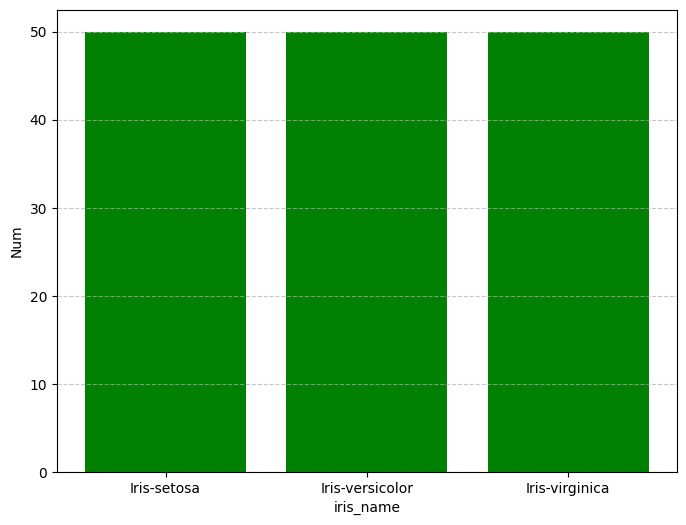

In [39]:
counter=Counter(dataset_iris['class'])
values=list(counter.values())
label = list(counter.keys())
plt.figure(figsize=(8,6))
plt.bar(label, values, color='green',tick_label=label)
plt.xlabel('iris_name')
plt.ylabel('Num')
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
print(label)
plt.show()

In [40]:
#将 class列进行编码处理
iris_encoding = {'class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}
for col, mapping in iris_encoding.items():
    dataset_iris[col] = dataset_iris[col].replace(mapping)

In [41]:
picekd_features=["sepal_length", "sepal_width"]
x_data=dataset_iris[picekd_features]
y_data=dataset_iris['class']

In [42]:
class K_means_cluster(object):
    def __init__(self, x_data, y_data, k_values = 3, max_epoch=100, epsilon=1e-4,distance_name='Euclidean'):
        #初始化
        self.x=x_data
        self.y=y_data
        
        self.k=k_values
        self.epsilon=epsilon
        self.centroids=[]
        self.max_epoch=max_epoch
        self.distance_name=distance_name
        num_sample,_ =x_data.shape
        self.labels=[]
        self.num_sample=num_sample
        self.feature_names=x_data.columns
        indices=np.random.choice(num_sample,self.k,replace=False)
        self.centroids=x_data.iloc[indices]

    def distance_function(self,x,centroids):
        if self.distance_name == 'Euclidean':
            return np.linalg.norm(centroids-x,axis=1,ord=2)
        if self.distance_name == 'Manhantan':
            return np.linalg.norm(centroids-x,axis=1,ord=1)
        if self.distance_name == 'Chebyshev':
            return np.linalg.norm(centroids-x,axis=1,ord=np.inf)
        
    def fit(self):
        
        for epoch in range(self.max_epoch):
            labels=[]
            for i in range(self.num_sample):
                distances=self.distance_function(self.x.iloc[i],self.centroids)
                label=np.argmin(distances, axis=0)
                labels.append(label)
            indices=[]
            new_centroids=pd.DataFrame(columns=self.feature_names)
            centroid_series=[]
            self.labels=labels.copy()
            for i in range(self.k):
                indices.append(np.where(np.array(self.labels)== i)[0])
                centroid_series.append((self.x.iloc[indices[i]]).mean())
            new_centroids=pd.concat(centroid_series, axis=1).T
            if np.all(np.linalg.norm(new_centroids -self.centroids, axis=1) < self.epsilon):
                break
            self.centorids=new_centroids
    def predict(self):
        return self.labels
    def cluster_plot(self):
        plt.figure(figsize=(8,6))
        plt.scatter(self.x[self.feature_names[0]],self.x[self.feature_names[1]], c=self.labels, cmap="viridis", s=30, alpha=0.5)
        # 绘制质心
        plt.scatter(self.centroids[self.feature_names[0]], self.centroids[self.feature_names[1]], c="red", s=200, marker="X", label="Centroids")
        plt.title("Iris Dataset with K-means")
        plt.xlabel(f"{self.feature_names[0]}")
        plt.ylabel(f"{self.feature_names[1]}")
        plt.grid(True)
        plt.show()






In [43]:
model=K_means_cluster(x_data=x_data,y_data=y_data)
model.fit()
y_predict_label=model.predict()
print(y_predict_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


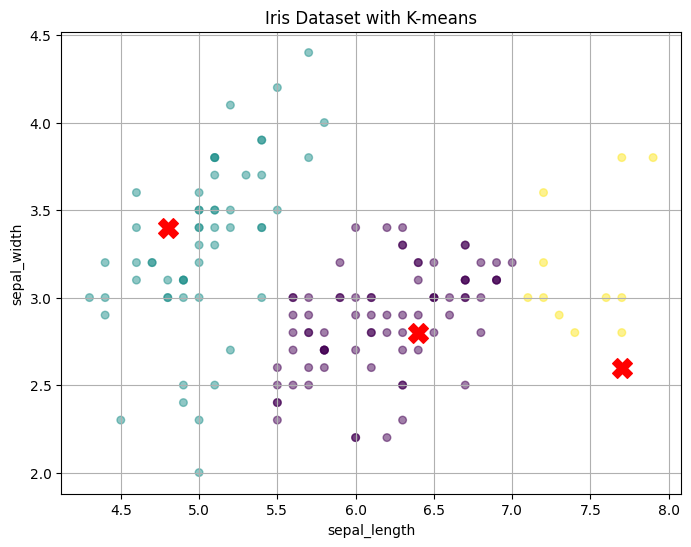

In [44]:
model.cluster_plot()

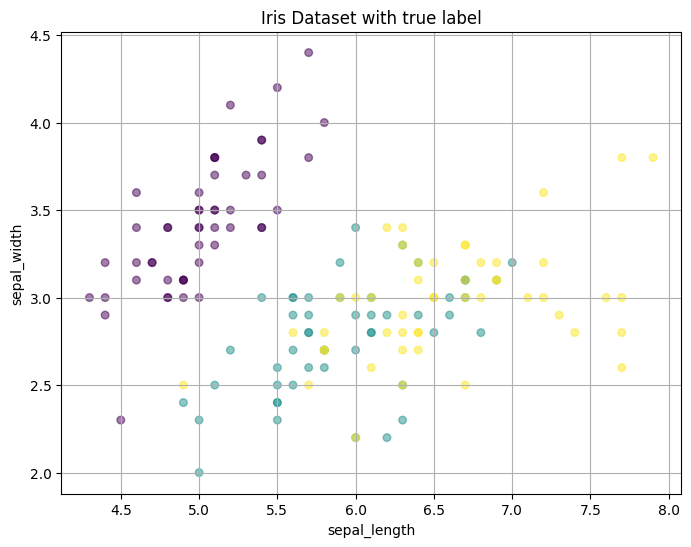

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(dataset_iris['sepal_length'],dataset_iris['sepal_width'], c=dataset_iris['class'], cmap="viridis", s=30, alpha=0.5)
plt.title("Iris Dataset with true label")
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.grid(True)
plt.show()

In [46]:
# 将 1 和 0 互换(根据输出的图像，0和1的标签反了)
y_predict = [1 if x == 0 else 0 if x == 1 else x for x in y_predict_label]

In [47]:
accuracy=accuracy_score(y_data,y_predict)
print(accuracy)

0.7066666666666667


[0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1]


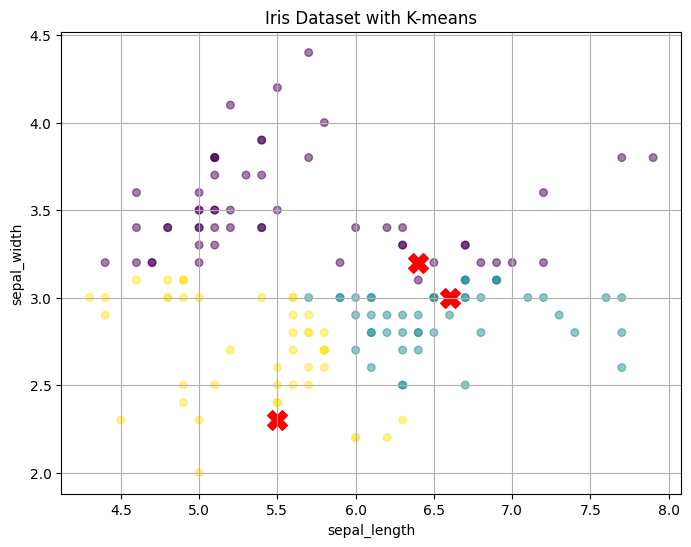

In [62]:
model_Manhantan=K_means_cluster(x_data=x_data,y_data=y_data,distance_name='Manhantan')
model_Manhantan.fit()
y_predict_label=model_Manhantan.predict()
print(y_predict_label)
model_Manhantan.cluster_plot()

In [ ]:
# 将 1 和 2 互换(根据输出的图像，2和1的标签反了)
y_predict = [1 if x == 2 else 2 if x == 1 else x for x in y_predict_label]
accuracy=accuracy_score(y_data,y_predict)
print(accuracy)

0.6133333333333333


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]


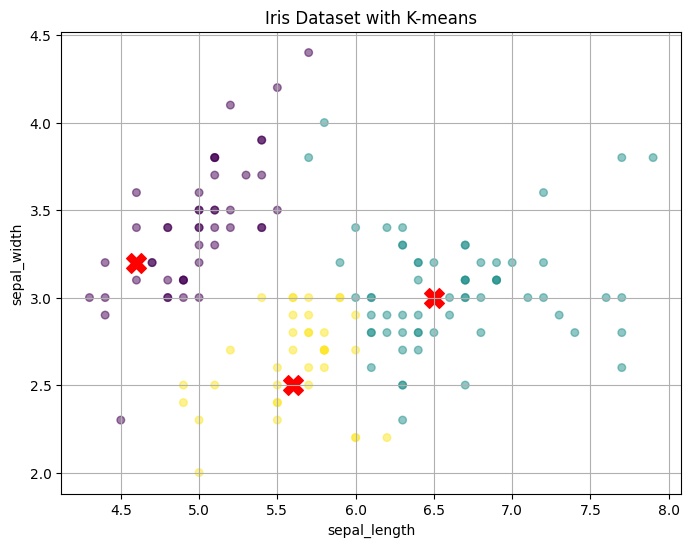

In [64]:
model_Chebyshev=K_means_cluster(x_data=x_data,y_data=y_data,distance_name='Chebyshev')
model_Chebyshev.fit()
y_predict_label=model_Chebyshev.predict()
print(y_predict_label)
model_Chebyshev.cluster_plot()

In [ ]:
# 将 2 和 0 互换(根据输出的图像，0和2的标签反了)
y_predict = [2 if x == 0 else 0 if x == 2 else x for x in y_predict_label]
accuracy=accuracy_score(y_data,y_predict)
print(accuracy)

0.5933333333333334


### Problem 2

In [65]:
from sklearn.decomposition import PCA

In [67]:
x_categorical_cols=[col for col in dataset_iris.columns if col not in ['class']]
x=dataset_iris[x_categorical_cols]
pca=PCA(n_components=2)
x_pca=pd.DataFrame(pca.fit_transform(x))


In [68]:
x_pca

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


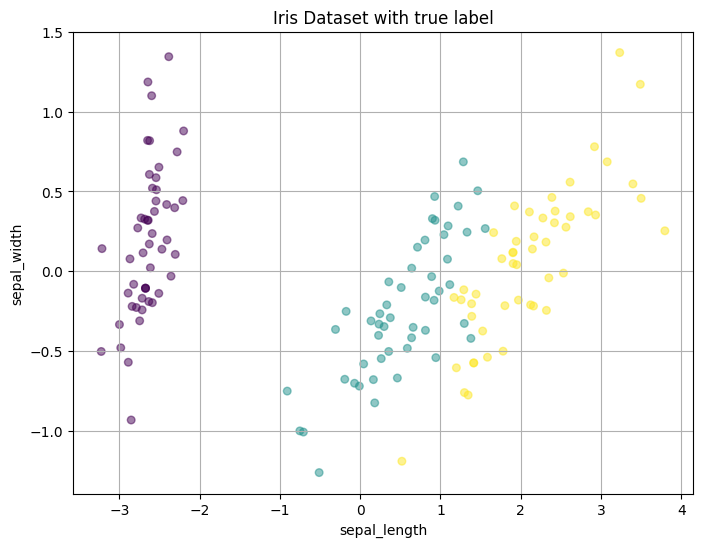

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[0],x_pca[1], c=dataset_iris['class'], cmap="viridis", s=30, alpha=0.5)
plt.title("Iris Dataset with true label")
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.grid(True)
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2]


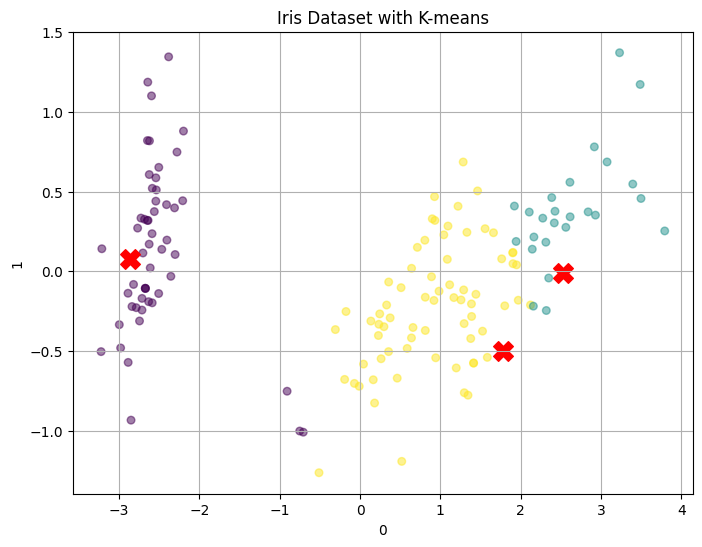

In [71]:
model_pca=K_means_cluster(x_data=x_pca,y_data=y_data)
model_pca.fit()
y_predict_label=model_pca.predict()
print(y_predict_label)
model_pca.cluster_plot()

In [72]:
# 将 2 和 1 互换(根据输出的图像，1和2的标签反了)
y_predict = [2 if x == 1 else 1 if x == 2 else x for x in y_predict_label]
accuracy=accuracy_score(y_data,y_predict)
print(accuracy)

0.82
